In [1]:
from sklearn.linear_model import LogisticRegression # para probar

import pandas as pd # para ligeras modificaciones y limpieza de datos
import numpy as np # para operaciones matematicas
import matplotlib.pyplot as plt # para graficar
import seaborn as sns # para usar la funcion pairplot

In [2]:
df = pd.read_csv(r'Call_Center_1999_DataSet.csv', delimiter=';')
df.head(4)


C:\Users\Martin\AppData\Local\Temp\ipykernel_12552\861341683.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Call_Center_1999_DataSet.csv', delimiter=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


In [3]:
df.info() # revisamos los tipos de datos de cada campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

No posee ningun dato nulo

In [4]:
df[df['call_id']== 33117]

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
14853,AA0202,33117,0.0,0,PS,1999-01-14,16:50:18,16:50:31,13,0:00:00,0:00:00,0,AGENT,16:50:30,16:52:46,136,ZOHARI,0
31152,AA0204,33117,0.0,0,NE,1999-01-31,13:31:27,13:31:39,12,0:00:00,0:00:00,0,AGENT,13:31:38,13:35:25,227,ELI,0
47118,AA0209,33117,0.0,0,NW,1999-02-12,10:44:35,10:44:44,9,10:44:44,10:47:57,193,HANG,0:00:00,0:00:00,0,NO_SERVER,31
71060,AA0210,33117,0.0,0,NW,1999-03-04,14:43:57,14:44:07,10,14:44:07,14:44:29,22,HANG,0:00:00,0:00:00,0,NO_SERVER,59
90546,AA0102,33117,0.0,0,PS,1999-03-21,18:02:19,18:02:34,15,0:00:00,0:00:00,0,AGENT,18:02:33,18:05:12,159,NAAMA,59
105283,AA0109,33117,22138168.0,2,PS,1999-04-04,11:52:36,11:52:42,6,11:52:42,11:53:47,65,AGENT,11:53:45,11:55:37,112,YIFAT,90
115331,AA0110,33117,54128681.0,2,PS,1999-04-13,9:07:02,9:07:08,6,9:07:08,9:07:13,5,AGENT,9:07:13,9:07:16,3,TOVA,90
215364,AA0103,33117,33909094.0,1,PS,1999-07-02,11:57:11,11:57:17,6,11:57:17,11:58:12,55,AGENT,11:58:12,11:59:36,84,BASCH,181
309236,AA0104,33117,0,0,NW,1999-09-14,08:52:34,08:52:43,9,08:52:43,08:58:42,359,AGENT,08:58:40,09:00:07,87,GOLDIE,243


Con esto llego a la conclusion de que los call_id se repiten pero notemos tambien que estan asignados a distintos VRUs

-----
Ya que hay registros repetidos de call_id y de vru.line, vamos a crear un id para cada uno de estos registros de llamadas, se va a llamar id

In [6]:
df['call_id'] = (df['call_id'].astype(int)).astype(str)
df['vru.line'] = df['vru.line'].astype(str)

In [7]:
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [8]:

df['id'] = df['vru.line'] + '-' + df['call_id']
df['id']

## ordenamos las columnas:
df = df.reindex(columns=['id','vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'])
df.head(4)


,id,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101-33116,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101-33117,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101-33118,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101-33119,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


Verificamos que id_llamada solo tenga valores unicos:

In [10]:
len(df['id'].unique())
## Esta OK

444448

#### Lo que vamos a hacer ahora es analizar cada uno de los campos/columnas. Los pasos serian, primero ver cuantos valores distintos hay en es columna y en segundo lugar calcularemos su frecuencia absoluta (cantidad de veces que se repite) para luego calcular su frecuencia relativa y sacar conclusiones en base a las probabilidades.

In [11]:
## calculamos el total de nuestra poblacion
total_llamadas = len(df['id'].unique())
total_llamadas

444448

In [12]:
df['customer_id'].value_counts()
# aca vemos que 0.0 y 0 no los toma como iguales, habra que transformar todo a un mismo tipo de datos

0.0           178572
0              55980
58859752.0      1661
58704610.0      1375
7191646.0       1264
               ...  
22862023           1
3100351.0          1
53528683.0         1
15571748.0         1
53525267.0         1
Name: customer_id, Length: 19048, dtype: int64

In [13]:
## A continuacion vamos a solucionar el problema que estamos teniendo para homogeinezar los campos que poseen '0'(string) con los que poseen 0.0 (float)
df['customer_id'][df['customer_id'] == '0'] = df['customer_id'][df['customer_id'] == '0'].astype(float) # transformo '0' a 0.0
# verificamos que esto se haya corregido:
df['customer_id'].value_counts()
## Quedo OK

C:\Users\Martin\AppData\Local\Temp\ipykernel_12552\3326034874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id'][df['customer_id'] == '0'] = df['customer_id'][df['customer_id'] == '0'].astype(float) # transformo '0' a 0.0


0.0           234552
58859752.0      1661
58704610.0      1375
7191646.0       1264
52867744.0      1207
               ...  
36482305           1
29571775           1
55893531           1
64876170           1
53525267.0         1
Name: customer_id, Length: 19047, dtype: int64

De aqui podemos concluir que hay registros de *19047-1 = 19046* clientes identificados en este total de registros de llamadas, el *customer_id = 0.0* no se cuenta

**- Si 'customer_id' es 0, es porque el sistema no pudo identificar a la persona que realiza la llamada, es decir, podrian ser prospectos (potenciales clientes)**

In [16]:
prob_customers = pd.DataFrame() # defino mi variable como un DataFrame   
prob_customers['frec_abs'] = df['customer_id'].value_counts() # creo un df que tendra los id de cada cliente junto con su frec absoluta
prob_customers = prob_customers.reset_index() # como los id me los toma como indices, entonces resetearemos los index para que me lo tome como una columna aparte
prob_customers = prob_customers.rename(columns={'index':'customer_id'}) #renombramos la columna que queremos
prob_customers ## Ualá, tenemos un Dataframe que nos muestra las frecuencias absolutas de cada id de cliente


,customer_id,frec_abs
0,0.0,234552
1,58859752.0,1661
2,58704610.0,1375
3,7191646.0,1264
4,52867744.0,1207
...,...,...
19042,36482305,1
19043,29571775,1
19044,55893531,1
19045,64876170,1


##### Tabla definitiva con frecuencias de *customers*

In [17]:
total = prob_customers['frec_abs'].sum()
prob_customers['frec_rel'] = prob_customers['frec_abs']/total
prob_customers

,customer_id,frec_abs,frec_rel
0,0.0,234552,0.527738
1,58859752.0,1661,0.003737
2,58704610.0,1375,0.003094
3,7191646.0,1264,0.002844
4,52867744.0,1207,0.002716
...,...,...,...
19042,36482305,1,0.000002
19043,29571775,1,0.000002
19044,55893531,1,0.000002
19045,64876170,1,0.000002


<BarContainer object of 19047 artists>

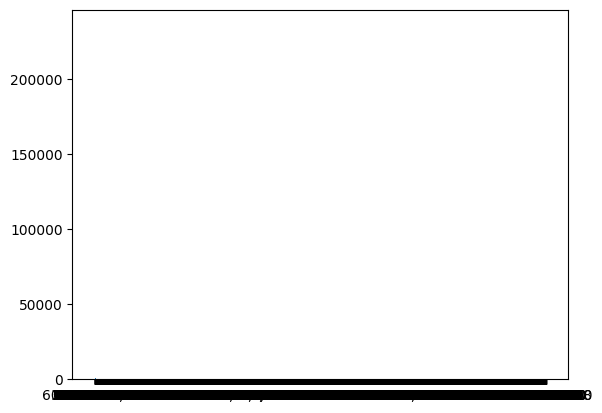

In [23]:
prob_customers['customer_id'] = prob_customers['customer_id'].astype(str)
plt.bar(prob_customers['customer_id'], prob_customers['frec_abs'], width=1)

# Primera conclusión

In [15]:
# Localizar en la columna 'frec_real' los registros en los que se cumpla que la columna 'customer_id' es 0

# porcentaje de llamadas no identificadas o prospectos
porc_no_id = prob_customers['frec_rel'].loc[prob_customers['customer_id'] == 0].values[0]

print (f'Con esto podemos decir que el {round(porc_no_id*100,2)}% del total de {total_llamadas} de llamadas corresponden a clientes no identificados o bien a prospectos (potenciales clientes)')

Con esto podemos decir que el 52.77% del total de 444448 de llamadas corresponden a clientes no identificados o bien a prospectos (potenciales clientes)


# Vamos de nuevo a nuestro dataset

In [16]:
df.head(4)

,id_llamada,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101-33116,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101-33117,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101-33118,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101-33119,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


Haremos un analisis parecido al que hicimos con *'customer_id'*, pero ahora lo haremos con *'priority'*

In [17]:
# voy a crear un pequeño dataframe con los distintos valores que puede tener priority con sus respectivas frecuencias absolutas en nuestra muestra
df_aux = df['priority'].value_counts()
total_llamadas = len(df['id_llamada'].unique())

priority = []
frec_abs = []
frec_rel = []

for a in df_aux.index:
    priority.append(a)
for a in df_aux:
    frec_abs.append(a)
    frec_rel.append(a/total_llamadas)

prob_priority = pd.DataFrame(
    {
       'priority': priority,
       'frec_abs': frec_abs,
       'frec_rel': frec_rel
    }
)

prob_priority

,priority,frec_abs,frec_rel
0,0,235168,0.529124
1,2,137453,0.309267
2,1,71827,0.161609


Notemos que los campos estan limpios, es decir, no tenemos el problema de que se confunda **1** con **1.0** o con **'1'**

# Segunda conclusión

- De aca podemos asegurar que el **52.91%** del total de llamadas corresponde a clientes no identificados
- El **30.92%** del total de llamadas corresponde a clientes regulares
- Y finalmente, el **16.16%** del total de llamadas corresponde a clientes de alta prioridad

# Vamos de nuevo a nuestro dataset

In [18]:
df.head(4)

,id_llamada,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101-33116,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101-33117,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101-33118,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101-33119,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


Seguiremos con la columna **'type'**

In [19]:
df['type'].value_counts()

PS     302522
NW      67728
NE      39342
IN      20732
TT      12289
PE       1824
 TT         6
AA          5
Name: type, dtype: int64

Notemos que tenemos un problema, tenemos un campo llamado 'TT' y otro llamado ' TT', deberemos homogeneizar estos valores para no transmitir datos erroneos.

In [20]:
df['type'].replace(' TT', 'TT', inplace=True)
df['type'].value_counts()

PS    302522
NW     67728
NE     39342
IN     20732
TT     12295
PE      1824
AA         5
Name: type, dtype: int64

Con el codigo anterior ya hemos homogeneizado los valores **'TT'** y **' TT'**

Ahora ya podemos hacer una tabla con los valores de frecuencia absoluta y frecuencia relativa de cada valor

In [39]:
unique_types = df['type'].unique()
lista = []
ind = 123
type(23)

# for type_aux in unique_types:

#     for i in df['type']:
#         if (type_aux == i):              
#               lista[ind] += 1
#         else:
#              continue
#     ind =+ 1

# lista


TypeError: 'str' object is not callable